In [236]:
!pip install --no-cache-dir xgboost --no-deps

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 87.5 kB/s eta 0:28:3

In [50]:
!pip install streamlit xgboost pandas scikit-learn joblib

# Importing Libraries

In [1]:
#load you library
import pandas as pd

# Loading Data

In [2]:
# load the data
data = pd.read_csv("adult 3.csv")
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
data.shape

(48842, 15)

In [4]:
data.head(7)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K


In [5]:
data.tail(7)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48835,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
48836,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


# Finding null values

In [6]:
data.isna()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

# Feature Engineering and Data Cleaning

In [8]:
data.drop(columns=['fnlwgt'], inplace=True)

In [9]:
data.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [10]:
data.gender.value_counts()

gender
Male      32650
Female    16192
Name: count, dtype: int64

In [11]:
data.education.value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [12]:
data['marital-status'].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

In [13]:
data.age.value_counts()

age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64

In [14]:
data.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [15]:
data.occupation.replace({'?':'Not Listed'},inplace=True)

C:\Users\cmaha\AppData\Local\Temp\ipykernel_12992\3472342446.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.occupation.replace({'?':'Not Listed'},inplace=True)


In [16]:
data.workclass.replace({'?':'Not Listed'},inplace=True)

C:\Users\cmaha\AppData\Local\Temp\ipykernel_12992\872672151.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.workclass.replace({'?':'Not Listed'},inplace=True)


In [17]:
data.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Not Listed           2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [18]:
data = data[data['workclass'] != 'Without-pay']
data = data[data['workclass'] != 'Never-worked']

In [19]:
data.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Not Listed           2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64

In [20]:
data.shape

(48811, 14)

In [21]:
data = data[data['education'] != 'Preschool']
data = data[data['education'] != '1st-4th']
data = data[data['education'] != '5th-6th']


In [22]:
data.drop(columns=['education'],inplace=True)

In [23]:
data['income'] = data['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [24]:
data

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Not Listed,10,Never-married,Not Listed,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [25]:
data.shape

(47972, 13)

# BoxPlot

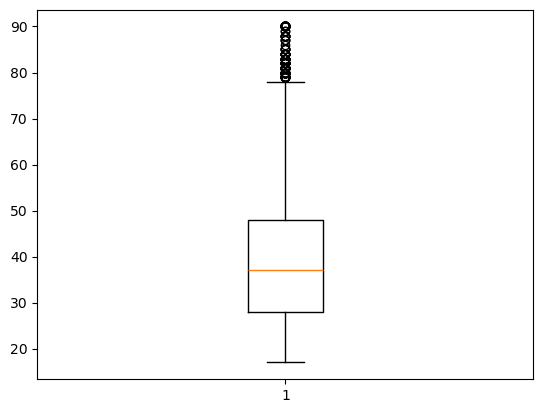

In [26]:
# Outliers
import matplotlib.pyplot as plt
plt.boxplot(data['age'])
plt.show()

In [27]:
data = data[(data['age']<=75) & (data['age']>=17)]

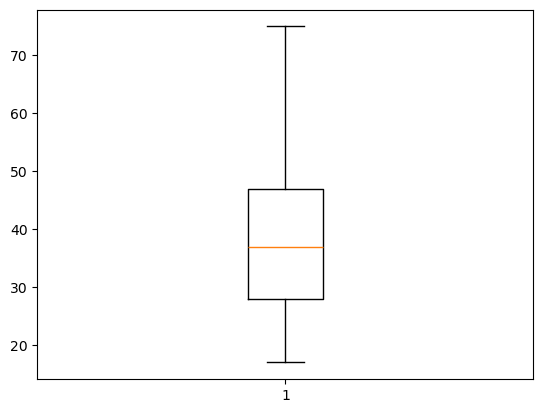

In [28]:
plt.boxplot(data['age'])
plt.show()

# Label Encoding

In [29]:
# Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['workclass'] = encoder.fit_transform(data['workclass'])
data['marital-status'] = encoder.fit_transform(data['marital-status'])
data['occupation'] = encoder.fit_transform(data['occupation'])
data['relationship'] = encoder.fit_transform(data['relationship'])
data['race'] = encoder.fit_transform(data['race'])
data['gender'] = encoder.fit_transform(data['gender'])
data['native-country'] = encoder.fit_transform(data['native-country'])

C:\Users\cmaha\AppData\Local\Temp\ipykernel_12992\2515700754.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['workclass'] = encoder.fit_transform(data['workclass'])
C:\Users\cmaha\AppData\Local\Temp\ipykernel_12992\2515700754.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['marital-status'] = encoder.fit_transform(data['marital-status'])
C:\Users\cmaha\AppData\Local\Temp\ipykernel_12992\2515700754.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

# Split the data 

In [30]:
# split the dataset
x = data.drop(columns=['income'])   #input
y = data['income']                  #output
x

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,3,7,4,6,3,2,1,0,0,40,39
1,38,3,9,2,4,0,4,1,0,0,50,39
2,28,1,12,2,11,0,4,1,0,0,40,39
3,44,3,10,2,6,0,2,1,7688,0,40,39
4,18,2,10,4,7,3,4,0,0,0,30,39
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,12,2,13,5,4,0,0,0,38,39
48838,40,3,9,2,6,0,4,1,0,0,40,39
48839,58,3,9,6,0,4,4,0,0,0,40,39
48840,22,3,9,4,0,3,4,1,0,0,20,39


# Splitting the data into train_test split

In [31]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state= 42, stratify = y)

In [32]:
xtrain

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
18532,45,6,10,4,0,4,4,0,0,0,40,39
28997,28,3,10,2,12,0,2,1,0,0,40,0
28919,55,3,7,4,6,1,2,0,0,0,40,39
1315,42,3,12,4,0,1,4,1,0,0,46,39
11792,31,0,9,2,11,0,4,1,0,0,53,39
...,...,...,...,...,...,...,...,...,...,...,...,...
16686,41,3,14,2,3,0,4,1,0,1977,65,39
15564,42,3,10,2,6,0,4,1,0,0,35,39
31836,39,3,9,2,8,0,4,1,0,0,60,39
999,36,3,13,4,10,1,2,1,0,0,40,39


# Scaling

In [33]:
from sklearn.preprocessing import MinMaxScaler

# Step 2: Fit on training set
scaler = MinMaxScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)


# Model Training and Evaluation

In [35]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
import numpy as np

# Train-test split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# Compute scale_pos_weight for XGBoost
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(ytrain), y=ytrain)
scale_pos_weight = class_weights[0] / class_weights[1]

# Apply SMOTE
smote = SMOTE(random_state=42)
xtrain_resampled, ytrain_resampled = smote.fit_resample(xtrain, ytrain)

# Define models
models = {
    'XGBoost(balanced)': XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss'),
    'Random Forest(balanced)': RandomForestClassifier(class_weight='balanced'),
    'Gradient Boosting(SMOTE)': GradientBoostingClassifier(),
    'KNN(SMOTE)': KNeighborsClassifier()
}

# Train and evaluate
results = []
for name, model in models.items():
    if 'SMOTE' in name:
        model.fit(xtrain_resampled, ytrain_resampled)
        ypred = model.predict(xtest)
    else:
        model.fit(xtrain, ytrain)
        ypred = model.predict(xtest)
    
    acc = accuracy_score(ytest, ypred)
    prec = precision_score(ytest, ypred)
    rec = recall_score(ytest, ypred)
    f1 = f1_score(ytest, ypred)
    
    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

# Create and sort DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)

# Output
print("\nBest Model:")
print(results_df.iloc[0])

print("\nModel Comparison Table:")
print(results_df)


C:\Users\cmaha\Downloads\anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:51:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best Model:
Model        Gradient Boosting(SMOTE)
Accuracy                     0.823394
Precision                    0.587488
Recall                       0.844237
F1 Score                     0.692841
Name: 0, dtype: object

Model Comparison Table:
                      Model  Accuracy  Precision    Recall  F1 Score
0  Gradient Boosting(SMOTE)  0.823394   0.587488  0.844237  0.692841
1   Random Forest(balanced)  0.853528   0.696313  0.672452  0.684175
2                KNN(SMOTE)  0.813314   0.577778  0.775256  0.662106
3         XGBoost(balanced)  0.857728   0.911439  0.439697  0.593215


C:\Users\cmaha\AppData\Local\Temp\ipykernel_12992\4265553131.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=models, palette='viridis')


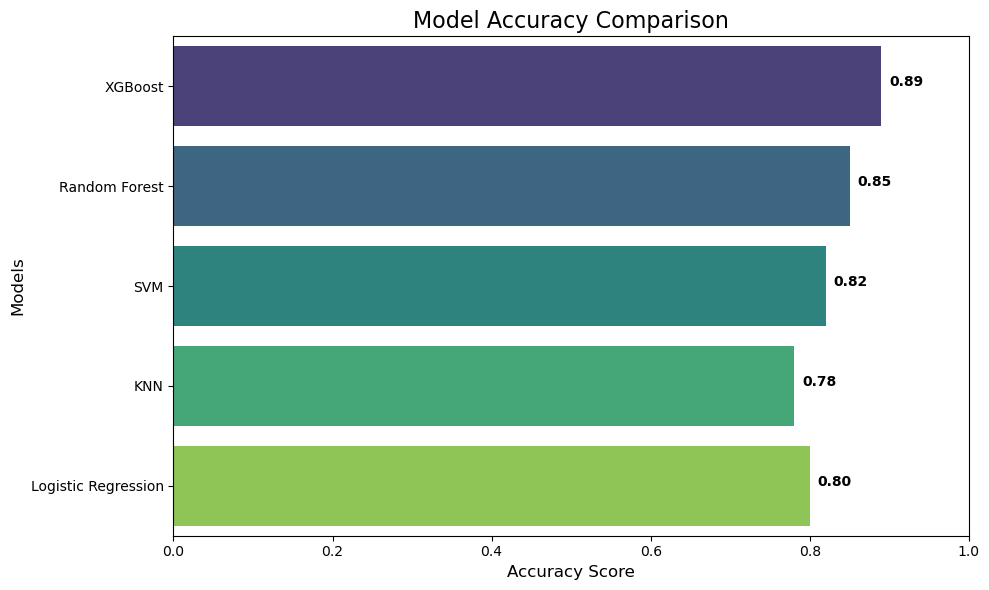

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the results dictionary (replace with your actual scores)
results = {
    'XGBoost': 0.89,
    'Random Forest': 0.85,
    'SVM': 0.82,
    'KNN': 0.78,
    'Logistic Regression': 0.80
}

# Extract keys and values
models = list(results.keys())
scores = list(results.values())

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=scores, y=models, palette='viridis')

plt.title("Model Accuracy Comparison", fontsize=16)
plt.xlabel("Accuracy Score", fontsize=12)
plt.ylabel("Models", fontsize=12)
plt.xlim(0, 1)

# Add values on bars
for i, v in enumerate(scores):
    plt.text(v + 0.01, i, f"{v:.2f}", color='black', fontweight='bold')

plt.tight_layout()
plt.show()



# Saving the model

In [41]:
import joblib

joblib.dump(model, 'xgboost_model.pkl')


['xgboost_model.pkl']